Copyright - Mayank Raj(B19CSE053)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from random import seed
from random import random
from math import exp
from random import randrange
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("seeds.csv")
df.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


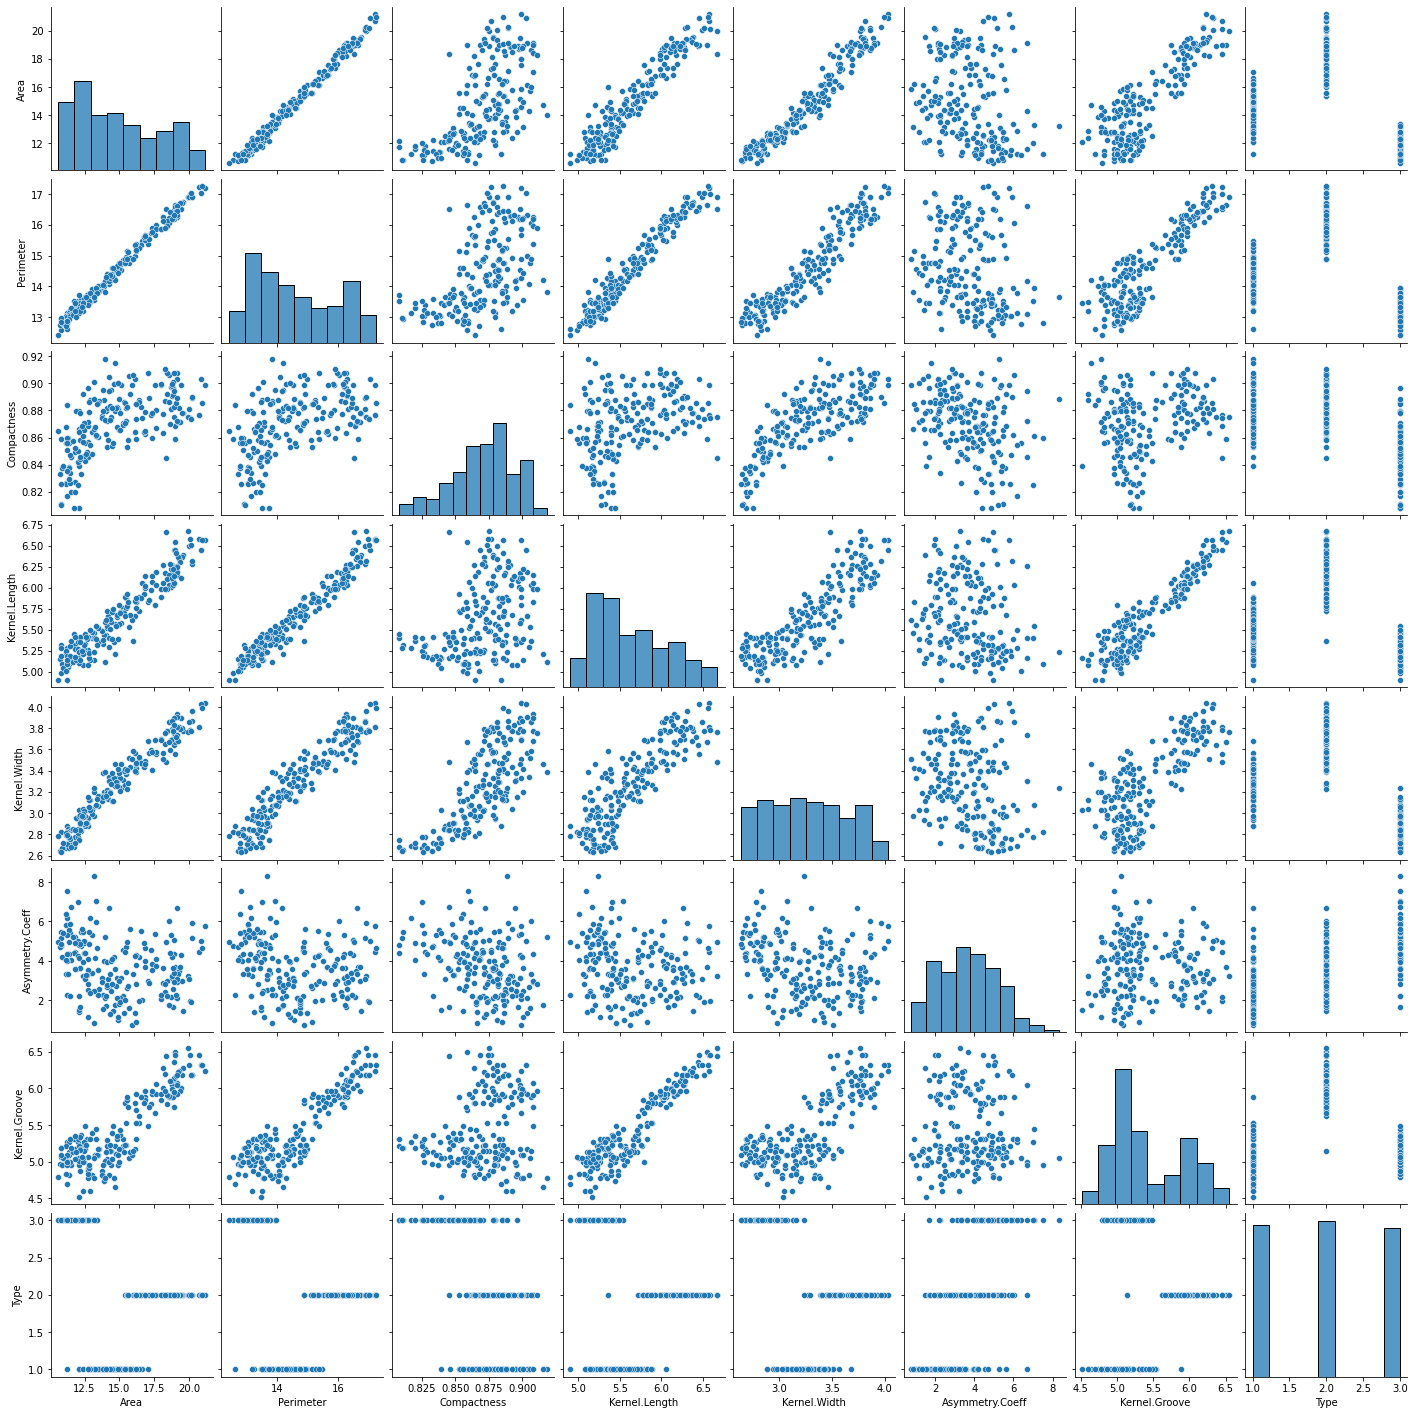

In [3]:
#to see basic relation of data
sns.pairplot(df)

In [4]:
#normalising the dataset
temp=df.drop("Type",axis=1)
temp2=(temp-temp.mean())/temp.std()
temp2
temp2["Type"]=df["Type"].values
df=temp2
df

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,0.116870,0.186327,0.008124,0.270178,0.122825,-1.004836,-0.407238,1
1,-0.013269,-0.019710,0.441229,-0.200974,0.178333,-1.822590,-0.943041,1
2,-0.215325,-0.385998,1.466100,-0.793859,0.188906,-0.679910,-1.208914,1
3,-0.369436,-0.500463,1.058724,-0.719467,0.299923,-0.979005,-1.249505,1
4,0.418242,0.300792,1.397490,0.033475,0.783638,-1.593511,-0.498568,1
...,...,...,...,...,...,...,...,...
194,-0.934509,-1.065157,0.321160,-1.141024,-0.752092,-0.046371,-1.117583,3
195,-1.263279,-1.309349,-0.845221,-1.134261,-1.243737,0.425384,-0.847652,3
196,-0.588616,-0.714131,0.749977,-0.917847,-0.088635,3.137636,-0.740085,3
197,-1.054373,-1.057526,-0.802340,-1.055360,-1.135364,-0.068804,-0.764440,3


In [5]:
#converting df to list and subtracting 1 from type column
df_list=df.values.tolist()
for row in df_list:
  row[-1]=int(row[-1])-1
df_list

[[0.1168695591808433,
  0.18632673920262618,
  0.008123811982782655,
  0.2701781242111462,
  0.12282496473003353,
  -1.0048363487182923,
  -0.40723766886463103,
  0],
 [-0.0132685068662091,
  -0.019710216906801848,
  0.44122857867214504,
  -0.20097400845408836,
  0.17833329474050397,
  -1.822590479302444,
  -0.9430412794699938,
  0],
 [-0.21532497783400206,
  -0.38599813887911927,
  1.46610025430341,
  -0.7938592280280445,
  0.1889063099805934,
  -0.6799099360672332,
  -1.2089135256415955,
  0],
 [-0.3694358455213011,
  -0.5004631144954687,
  1.0587244836549972,
  -0.7194667860282717,
  0.29992297000153195,
  -0.9790053786749028,
  -1.249504708263215,
  0],
 [0.41824192265822885,
  0.30079171481897554,
  1.3974895981942022,
  0.03347489966641174,
  0.7836384172356229,
  -1.5935105607597515,
  -0.4985678297632725,
  0],
 [-0.18450280429654164,
  -0.29442615838603925,
  1.0415718196276975,
  -0.5796991677256654,
  0.12282496473003353,
  -0.8410136176536368,
  -0.9430412794699938,
  0],
 

Implemented whole neural network from scratch by making a Class and adding appropriate methods to it
Copyright - Mayank Raj(B19CSE053)

In [6]:
class NeuralNetwork:
    def __init__(self,df_list1):
        self.df_list1=df_list1
        # # self.algo=algo
        #  self.n_folds=n_folds
        #  self.learning_rate=learning_rate
        #  self.epochs=epochs
        #  self.n_hidden=n_hidden
    def accuracy53(self,actual, pred):
        c = 0
        tot=0
        for i in range(len(actual)):
            tot+=1
            if actual[i] == pred[i]:
                c += 1
        return ((c)/(1.0*tot))*100.0
    def create_layer(self,n1,n2):
        layer=[{'weights':[random() for i in range(n1+1)]} for i in range(n2)]
        return layer
    def init_network(self,n_inputs, n_hidden, n_outputs):
        network = list()
        hidden_layer = self.create_layer(n_inputs,n_hidden)
        network.append(hidden_layer)
        output_layer = self.create_layer(n_hidden,n_outputs)
        network.append(output_layer)
        return network



    #Transfer function sigmoid
    def transfer(self,p):
        k= 1.0/(1.0+exp(-p))
        return k
    
    def fd_pass(self,net, row):
        inputs=row
        for i in net:
            new_in=[]
            for j in i:
                act=self.activate(j['weights'],inputs)
                j['output']=self.transfer(act)
                new_in.append(j['output'])
            inputs=new_in
        return inputs
    # Calculate the derivative of an neuron output (sigmoid)
    def transfer_derivative(self,out):
        return out*(1.0 - out)
        
    #error = (expected - output) * transfer_derivative(output)
    def bk_pass_error(self,network, expected):
        for i in reversed(range(len(network))):
            layer = network[i]

            errors = list()
            if i != len(network)-1:
                for j in range(len(layer)):

                    error = 0.00
                    for neuron in network[i + 1]:
                        error += (neuron['weights'][j] * neuron['delta'])#error = (expected - output) * transfer_derivative(output)
                    errors.append(error)
            else:
                for j in range(len(layer)):

                    neuron = layer[j]
                    errors.append(expected[j] - neuron['output'])
            for j in range(len(layer)):

                neuron = layer[j]
                #error = (expected - output) * transfer_derivative(output)
                neuron['delta'] = errors[j] * self.transfer_derivative(neuron['output'])
    def upd_weights(self,network, row, l_rate):
        for i in range(len(network)):
            inputs = row[:-1]
            if i != 0:
                inputs = [neuron['output'] for neuron in network[i - 1]]
            for neuron in network[i]:
                for j in range(len(inputs)):
                    neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
                neuron['weights'][-1] += l_rate * neuron['delta']
    def train_network(self,net,train, learning_rate, n_epoch, n_outputs):
        for j in range(n_epoch):
            for row in train:
                outputs = self.fd_pass(net, row)
                expected = [0 for i in range(n_outputs)]
                expected[row[-1]] = 1
                self.bk_pass_error(net, expected)
                self.upd_weights(net, row, learning_rate)

    # Backpropagation Algorithm With Stochastic Gradient Descent
    def bk_pass(self,train, test, learning_rate, n_epoch, n_hidden):
        n_inputs =len(train[0]) - 1
        n_outputs =len(set([row[-1] for row in train]))
        network = self.init_network(n_inputs, n_hidden, n_outputs)

        self.train_network(network, train, learning_rate, n_epoch, n_outputs)
        predictions =list()
        for row in test:
            prediction = self.predict(network, row)
            predictions.append(prediction)
        return(predictions)

    def cv_split(self,data,n):
        d1,d2 = list(),list(data)
        
        sz = int(len(data) / n_folds)
        if len(d2)==0:
            return
        for i in range(n):
            fold = list()
            while len(fold) < sz:
                index = randrange(len(d2))
                fold.append(d2.pop(index))
            d1.append(fold)
        return d1

    def evaluate_algorithm(self,n, *args):
        dataset=self.df_list1
        folds = self.cv_split(dataset,n)
        scores = list()
        for fold in folds:
            train_set = list(folds)
            train_set.remove(fold)
            train_set,test_set = sum(train_set, []),list()
            # test_set = list()
            for row in fold:
                row_copy = list(row)
                test_set.append(row_copy)
                row_copy[-1] = None
            predicted = self.bk_pass(train_set, test_set, *args)
            actual = [row[-1] for row in fold]
            acc = self.accuracy53(actual, predicted)
            scores.append(acc)
        return scores
    def predict(self,net,row):
        ans = self.fd_pass(net, row)
        return ans.index(max(ans))
    def activate(self,weights, inputs):
        activation =weights[-1]
        for i in range(len(weights)-1):
            activation += (weights[i]*inputs[i]) #activating
        return activation
    




In [14]:
n_folds,learning_rate,epochs,n_hidden = 10,0.1,500,15 
model1=NeuralNetwork(df_list)
s=model1.evaluate_algorithm(n_folds,learning_rate,epochs,n_hidden)
print("Scores",s)
def meanAccuracy(arr):
    accur= sum(arr)/float(len(arr))
    return accur
print("Mean Accuracy",meanAccuracy(s),"%")
# print('Mean Accuracy: %.5f%%' % (meanAccuracy(s))


Scores [94.73684210526315, 94.73684210526315, 100.0, 94.73684210526315, 94.73684210526315, 94.73684210526315, 94.73684210526315, 100.0, 94.73684210526315, 100.0]
Mean Accuracy 96.31578947368419 %


Now We will use sklearn library for the same neural network
Copyright - Mayank Raj(B19CSE053)


In [8]:
x_train, x_test, y_train, y_test = train_test_split(df,df["Type"],test_size=0.3,random_state=1)

In [9]:
x_train.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
124,0.901123,0.812069,1.213098,0.333299,1.121975,1.133016,0.487798,2
97,1.051809,0.964689,1.217387,0.556476,1.132548,-1.108840,0.845000,2
42,0.065499,-0.042603,1.191658,-0.144616,0.519313,-0.388292,-0.488420,1
17,-0.074913,-0.294426,1.907781,-0.987730,0.529886,-1.313448,-1.566116,1
5,-0.184503,-0.294426,1.041572,-0.579699,0.122825,-0.841014,-0.943041,1


In [10]:
x_test.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
175,-0.694781,-0.630190,-0.716576,-0.333979,-0.633146,1.689742,-0.212400,3
40,-0.602314,-0.798072,1.290285,-1.138770,-0.170576,-0.841693,-1.294155,1
34,0.438790,0.514460,0.111040,0.412200,0.524600,-0.595619,0.215837,1
90,1.178522,1.468334,-1.098223,2.305826,0.580108,0.838679,2.085061,2
145,-0.996153,-0.820965,-1.968721,-0.536867,-1.293959,2.238310,-0.305760,3


In [11]:

print(x_train.shape)
print(x_test.shape)

(139, 8)
(60, 8)


In [13]:
nn=MLPClassifier(max_iter=500,random_state=1)
nn.fit(x_train,y_train)
print(nn.score(x_test,y_test)*100,"%")

98.33333333333333 %


Copyright - Mayank Raj(B19CSE053)